# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** Samuel Reid 

**Dataset:** Restaurant Revenue Prediction Dataset

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [30]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

We are trying to predict restaurant revenue. It represents the total amount of money the restaurant makes within the timeframe of the dataset. 

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

The business owner and managers would care about this prediction. They would use it to make informed decisions about their restaurant's performance and to optimize their operations. This would help them know what features and what values to focus on in order to increase their revenue.

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

I don't have a massive amount of domain knowlege on this. But right off, average cost of meal, number of customers and Marketing budget are the most obvious direct things. The intangable things that could move the needle that are less numeric and more numbers based are things like the ambiance, service quality, chef experience and so on I suspect will play a smaller role but still a significant role.

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [31]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('restaurant_data.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 8,368 rows, 17 columns

Column names:
['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Parking Availability', 'Weekend Reservations', 'Weekday Reservations', 'Revenue']


In [32]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head(5)


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [33]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:
df.tail(5)


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48
8367,Restaurant 8367,Rural,Japanese,4.0,33,71.07,2003,24268,8,197,151.838065,5.9,7.5,Yes,5,12,534142.98


### 2.2 Data Types and Info

In [34]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [35]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:
df.describe()


,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [36]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')
#WHAT EXACTLY ARE WE DOING HERE? 
# YOUR CODE HERE:
df.describe(include='object')


,Name,Location,Cuisine,Parking Availability
count,8368,8368,8368,8368
unique,8368,3,6,2
top,Restaurant 0,Downtown,French,Yes
freq,1,2821,1433,4189


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

[Write your description here]

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [37]:
# Define your target variable
TARGET = 'Revenue'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: Revenue

Basic Statistics:
count    8.368000e+03
mean     6.560706e+05
std      2.674137e+05
min      1.847085e+05
25%      4.546514e+05
50%      6.042421e+05
75%      8.130942e+05
max      1.531868e+06
Name: Revenue, dtype: float64


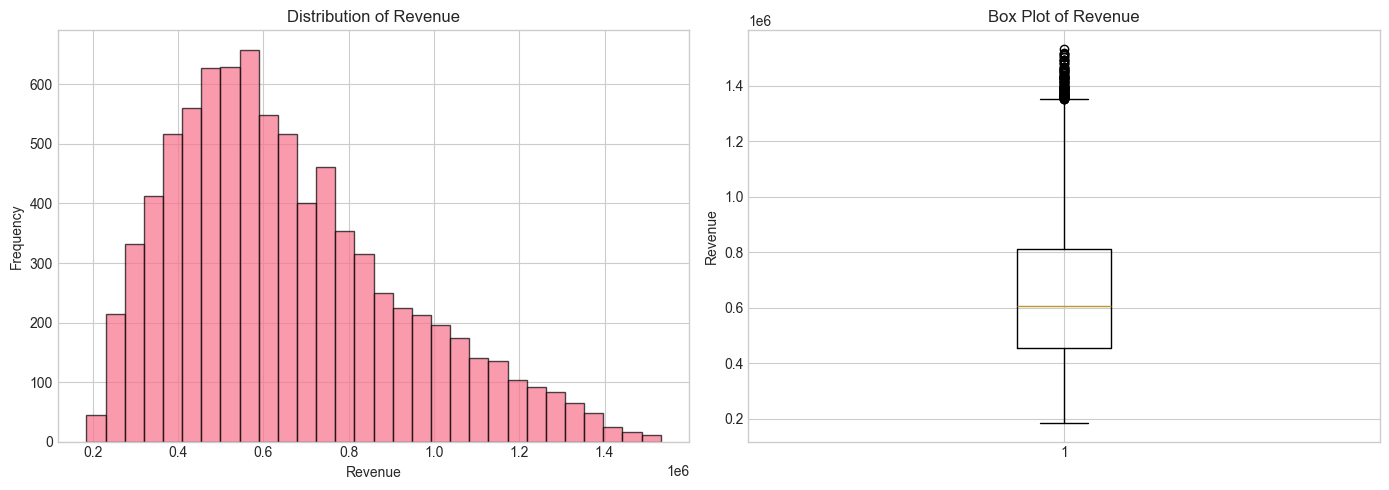


Skewness: 0.74
→ Target is moderately skewed.


In [38]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [39]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:

duplicate = df.duplicated().sum()
print(f"Duplicate rows: {duplicate}, {duplicate / len(df) * 100:.2f}%")




Duplicate rows: 0, 0.00%


In [40]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:

#for x in df.columns


missing_df = pd.DataFrame({'Missing Count': df.isnull().sum(),
                           'Missing %': (df.isnull().sum() / len(df)) * 100})
missing_df.sort_values(by='Missing %', ascending=False)
missing_df.loc[missing_df['Missing %'] > 0]



,Missing Count,Missing %


In [41]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

The revenue is skewed toward the lower side. 

There are no obvious or outragoous outliers. There are some on the higher side, but it does not appear very extreme. It is a similar distribution pattern we see else where in most datasets. 
 
The data has no missing values.

There are no duplicate rows.

I am suprised at how clean the data is. It makes sense, I think this was labled as practice data. But the data types and things like that all seem pretty normal and what I would expect. 

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [42]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols
#df_restruant.Remove('Revenue')

# YOUR CODE HERE:
#df_restruant = df
numerical_cols = df.select_dtypes(include=[np.number])
numerical_cols = numerical_cols.columns.tolist()
numerical_cols.remove('Revenue')

print(len(numerical_cols))

print(numerical_cols)





12
['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations']


### 4.2 Categorical Features Analysis

In [43]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:



categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(len(categorical_cols))
print(categorical_cols)
    
print(f"Number of unique values: {df[categorical_cols].nunique()}")
print(f"Top 10 value counts: {df[categorical_cols].value_counts().head(10)}")
print("\n" + "="*50)



4
['Name', 'Location', 'Cuisine', 'Parking Availability']
Number of unique values: Name                    8368
Location                   3
Cuisine                    6
Parking Availability       2
dtype: int64
Top 10 value counts: Name             Location  Cuisine   Parking Availability
Restaurant 0     Rural     Japanese  Yes                     1
Restaurant 1     Downtown  Mexican   Yes                     1
Restaurant 10    Rural     French    No                      1
Restaurant 100   Rural     Italian   No                      1
Restaurant 1000  Rural     French    Yes                     1
Restaurant 1001  Rural     Mexican   Yes                     1
Restaurant 1002  Rural     Japanese  No                      1
Restaurant 1003  Rural     Mexican   No                      1
Restaurant 1004  Downtown  Japanese  No                      1
Restaurant 1005  Rural     Japanese  Yes                     1
Name: count, dtype: int64



### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

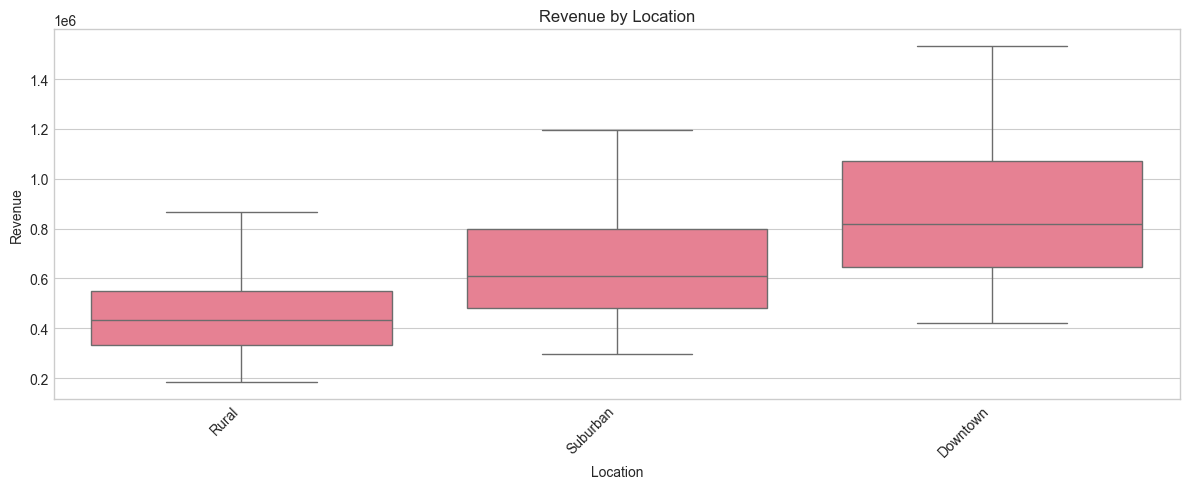


Mean Revenue by Location:
                   mean      median  count
Location                                  
Downtown  866582.166707  818174.650   2821
Suburban  647049.702747  608486.650   2785
Rural     450158.131676  431758.635   2762



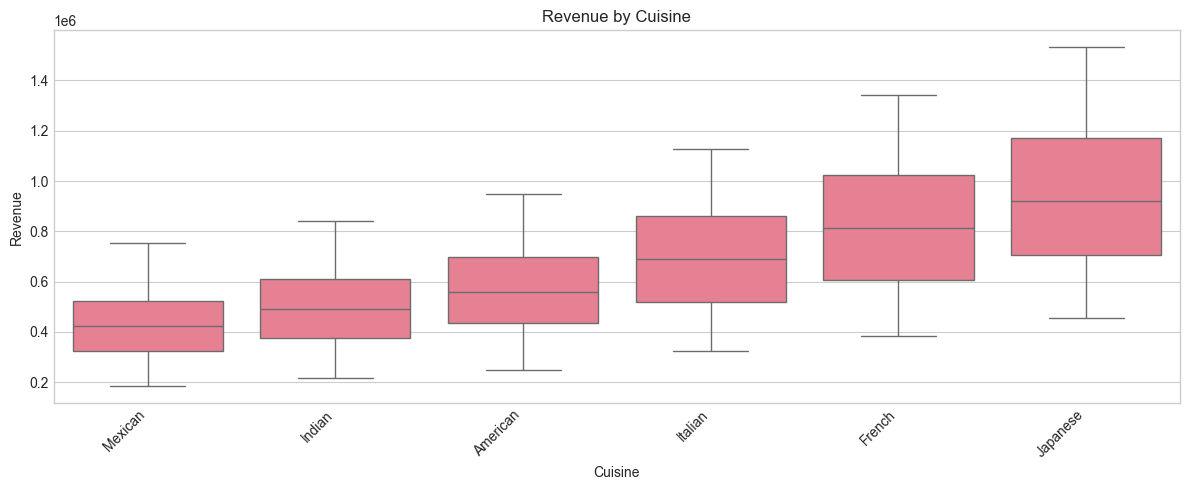


Mean Revenue by Cuisine:
                   mean     median  count
Cuisine                                  
Japanese  937969.038810  920170.84   1344
French    820204.107132  814849.96   1433
Italian   692742.385796  688980.70   1413
American  564942.031518  558831.08   1416
Indian    496615.723944  489517.92   1369
Mexican   427383.895621  422836.90   1393



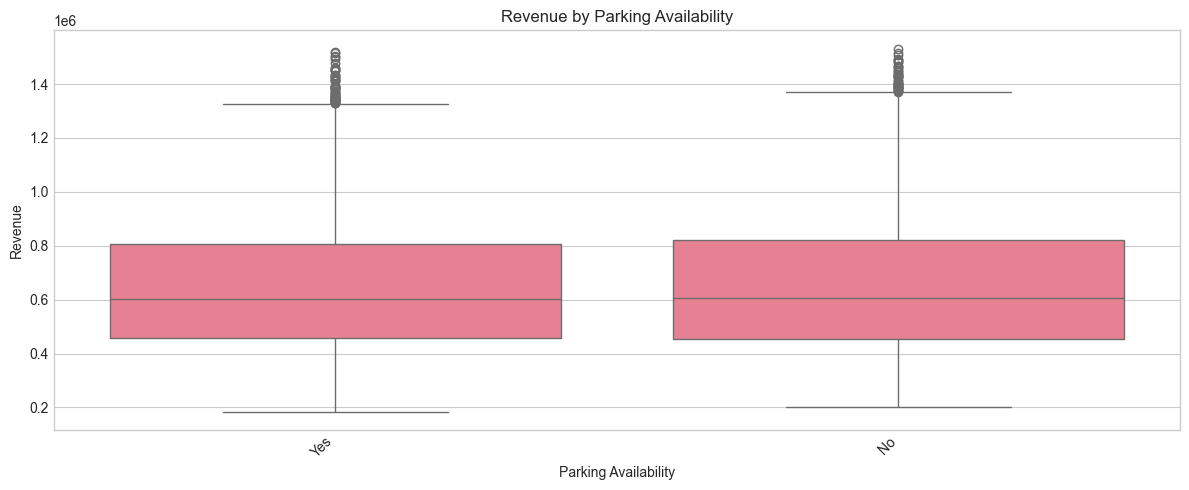


Mean Revenue by Parking Availability:
                               mean     median  count
Parking Availability                                 
No                    657020.396135  606839.40   4179
Yes                   655122.998011  602311.37   4189



In [44]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

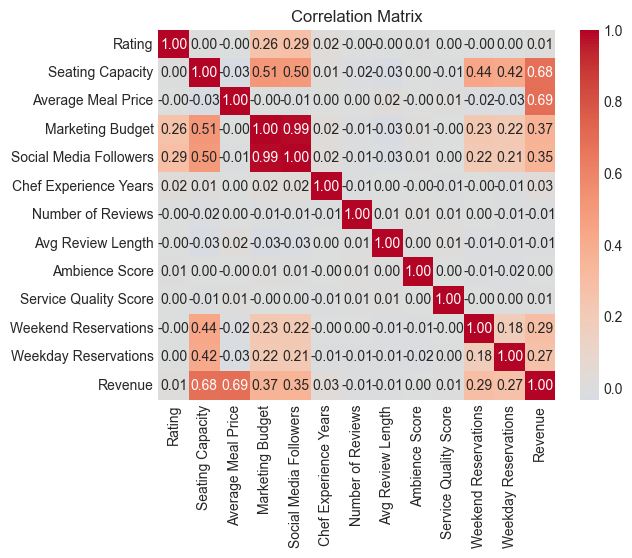

In [45]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:

numerical_cols_with_target = numerical_cols + [TARGET]
correlation_matrix = df[numerical_cols_with_target].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [46]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:

target_correlations = correlation_matrix[TARGET].drop(TARGET).sort_values(ascending=False)
print(target_correlations)

strong_correlations = target_correlations[target_correlations.abs() > 0.5]
print("\nStrong Correlations:")
print(strong_correlations)


Average Meal Price        0.686365
Seating Capacity          0.677317
Marketing Budget          0.365322
Social Media Followers    0.354466
Weekend Reservations      0.292400
Weekday Reservations      0.273284
Chef Experience Years     0.026899
Rating                    0.009899
Service Quality Score     0.005375
Ambience Score            0.003388
Number of Reviews        -0.008233
Avg Review Length        -0.011278
Name: Revenue, dtype: float64

Strong Correlations:
Average Meal Price    0.686365
Seating Capacity      0.677317
Name: Revenue, dtype: float64


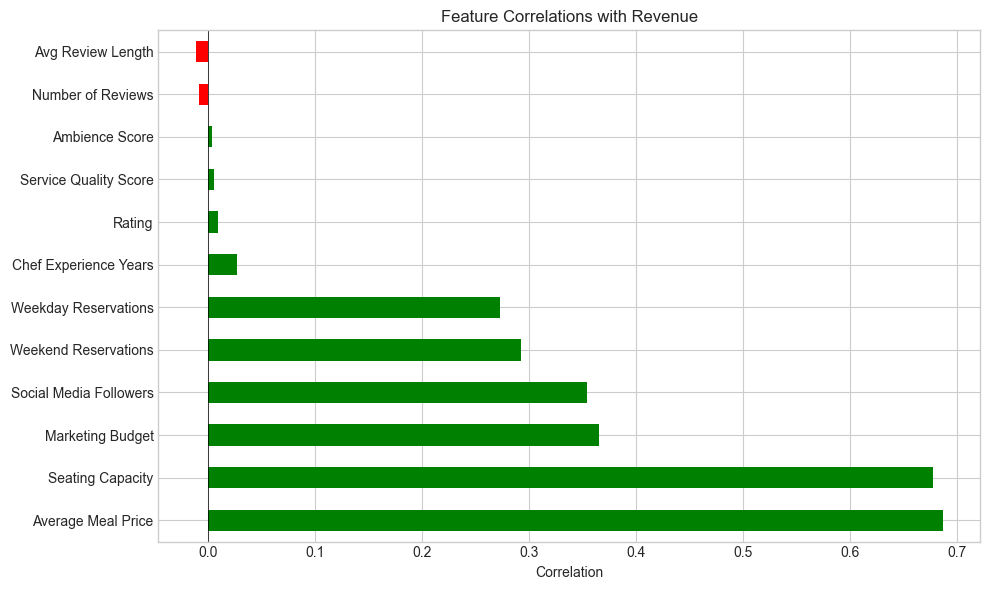

In [47]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

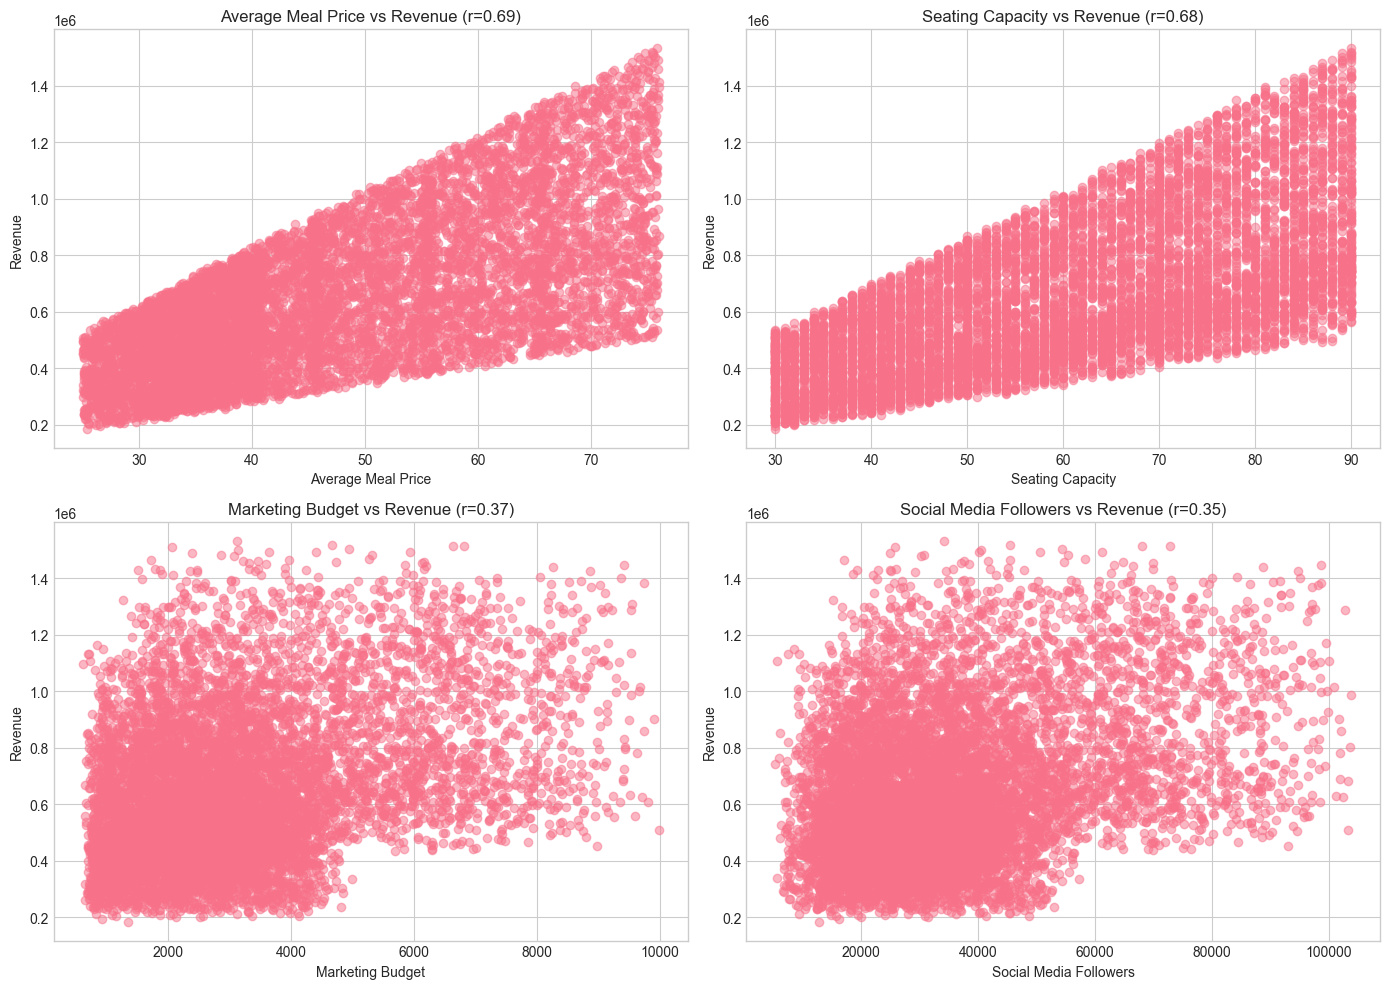

In [48]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

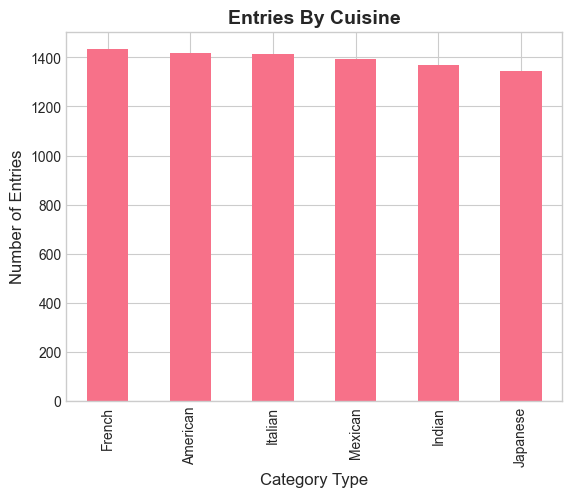

In [49]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!

# Your code here



df['Cuisine'].value_counts().plot(kind='bar')
plt.title('Entries By Cuisine', fontsize=14, fontweight='bold')
plt.xlabel('Category Type', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.show()


<Axes: ylabel='Revenue'>

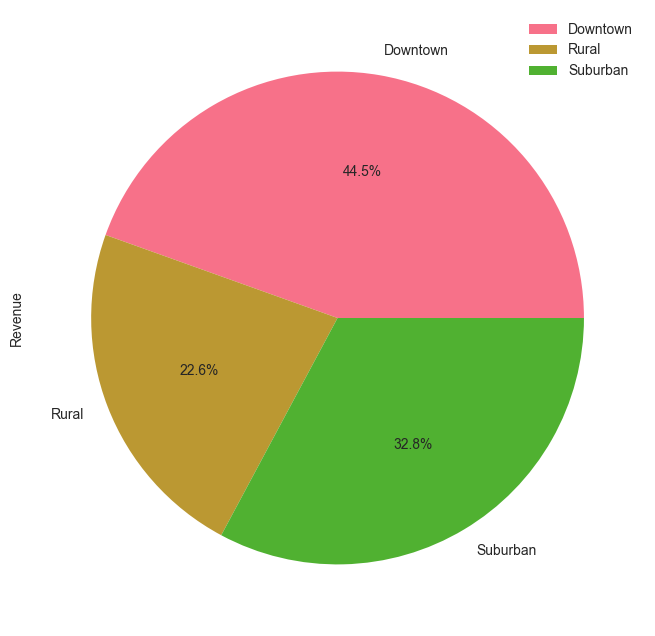

In [50]:
# More exploration...

df.groupby('Location').sum().plot(kind='pie', y='Revenue', figsize=(8, 8), autopct='%1.1f%%')

<Axes: ylabel='Revenue'>

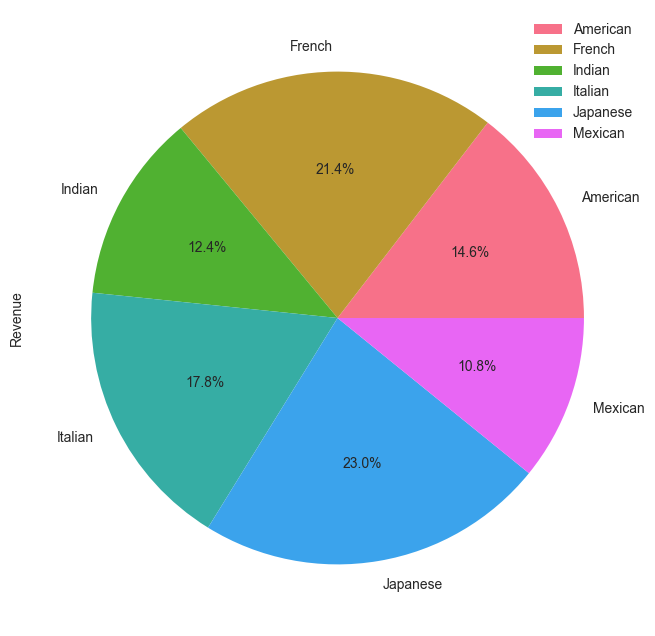

In [51]:
df.groupby('Cuisine').sum().plot(kind='pie', y='Revenue', figsize=(8, 8), autopct='%1.1f%%')

**What additional insights did you discover?**

[Describe any additional findings from your custom exploration]

The different cuisines have a similar amount of entries.

Avg Price per meal is a corrolated with revenue. And also, the amount of seating that restaurant has is corrolated with revenue. 

Most of the revenue is coming from downtown restruants. Also, the most of the revenue is from Japanese and French restruants. 






### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?

Avg Meal price 
Seeating capacity 
Marketing Budget 

- Which categorical features show the biggest differences in target?

- Are there any features that seem unimportant?

Yes, Avg Review Length, Number of Reviews, Ambience Score and Service Quality Score 

- Did you discover any interesting patterns or relationships?

Yes, that the amount of entries for the different cuisines is similar.But the revenue compositsion leans more toward the Japancese and French cuisines.

Also, the features that are more correlated with revenue are Avg Meal Price, Seating Capacity, Marketing Budget. 

- Are there any concerns about the data (outliers, skewness, etc.)?

No, the data is pretty clean and not that skewed. There are a few outliers. But only in a few columns. I removed the one that was higher then the threshold cut off.
**Your summary:**

[Write your summary here]

The data was pretty clean and not too skewed. I had to remove a few outliers. The data was pretty clean and not too skewed. I had to remove a few outliers. The data was pretty clean and not too skewed. I had to remove a few outliers. But only in a few columns. I removed the one that was higher then the threshold cut off.

This data seemed pretty good. There were multiple factors that had corrolation scores.   

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [52]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:
df_clean = df.copy()

print(f"Starting shape: {df_clean.shape}")



Starting shape: (8368, 17)


In [53]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

Columns to consider dropping:

1. >50% missing values: []

2. Potential ID/URL columns: []

3. High cardinality (>100 unique): ['Name']

4. Low variance (>95% same value): []


In [54]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = ['Name','Avg Review Length','Number of Reviews'
    # Add column names to drop here, e.g.:
    # 'id',
    # 'url',
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

Dropped 3 columns: ['Name', 'Avg Review Length', 'Number of Reviews']
New shape: (8368, 14)


**Explain which columns you dropped and why:**

Name was suggested in th ecells above to drop and it provides no predictive value. Avg Review Length and Number of Reviews were dropped becuase they score very low on the corrolation matrix above. 

### 5.2 Handle Duplicate Rows

In [55]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:
df_clean=df_clean.drop_duplicates()
print(f"Removed {len(df_clean) - len(df_clean.drop_duplicates())} duplicate rows.")

Removed 0 duplicate rows.


### 5.3 Handle Missing Values

In [56]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
Series([], dtype: int64)


In [57]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!





In [58]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

[Describe what you did for each column and why]

I just filled in the columns that are catergories with the mode and the numerical columns with the median.

I did this to fix the missing values in the dataset.

### 5.4 Handle Outliers (if needed)

In [59]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:
Marketing Budget: 389 outliers (4.6%) | bounds: [-1290.25, 7187.75]
Social Media Followers: 361 outliers (4.3%) | bounds: [-10368.12, 77526.88]
Revenue: 102 outliers (1.2%) | bounds: [-83012.85, 1350758.48]


In [60]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)


# YOUR CODE HERE:

#Code I started writting but then decided that this was pretty minimal. This is a very clean dataset already. 

#value_outliers=df_clean.columns['Social Media Followers','Revenue','Marketing Budget'].to_numpy().tolist()

#for x in value_outliers:
    #Q1 = df_clean[x].quantile(0.25)
    #Q3 = df_clean[x].quantile(0.75)
    #IQR = Q3 - Q1
  #  lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    #print(f"{x}: {lower_bound:.2f}, {upper_bound:.2f}")
 
df_clean = df_clean[df_clean['Marketing Budget'] < 7188]  # Remove extreme prices

df_clean = df_clean[df_clean['Social Media Followers'] < 77526]





**Explain your outlier handling strategy (or why you kept them):**

[Describe what you did and why]

I removed the outliers in the social media followers and marketing budget columns. 

I did this to keep the data from being too skewed. 



### 5.5 Data Type Corrections

In [61]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object


In [62]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:
df_clean

df_clean.head()



,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,4.0,38,73.98,2224,23406,13,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,4.7,48,48.29,2796,37285,18,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,4.4,34,51.55,1167,15214,13,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,8.6,2.1,No,37,26,1491046.35


## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [63]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:

df_clean['Vibe'] = df_clean['Ambience Score'] + df_clean['Service Quality Score']

df_clean['Total Reservations'] = df_clean['Weekday Reservations'] + df_clean['Weekend Reservations']






**Explain your new features:**

[Describe what features you created and why they might help predict the target]


I created a vibe score which is the sum of the ambience score and the service quality score. These are two low impact features but combined them to create a higher impact feature.

I also created a total reservations feature which is the sum of the weekday and weekend reservations. This should take into account how busy the restaurant is.



### 6.2 Encode Categorical Variables

In [64]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:

cat_cols=df_clean.select_dtypes(include=['object', 'category'])

for x in cat_cols:
    print(f"Column Name: {x}")
    print(f"Number of unique values: {df_clean[x].nunique()}")
    if df_clean[x].nunique() <= 10:
        print("Recommendation: one-hot encoding")
    else:
        print("Recommendation: consider label encoding or dropping")
    

Column Name: Location
Number of unique values: 3
Recommendation: one-hot encoding
Column Name: Cuisine
Number of unique values: 6
Recommendation: one-hot encoding
Column Name: Parking Availability
Number of unique values: 2
Recommendation: one-hot encoding


In [65]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# YOUR CODE HERE:
df_clean = pd.get_dummies(df_clean, columns=['Location', 'Cuisine', 'Parking Availability'], drop_first=True)  



**Explain your encoding strategy:**

[Describe what encoding methods you used and why]

I used one-hot encoding for the location, cuisine, and parking availability columns. Becuase they are categorical and have a low number of unique values.

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [66]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!



**Explain your additional feature engineering:**

[Describe any additional features you created and your reasoning]

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [67]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:


numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()

for x in numerical_features:
    print(f"Column Name: {x}")
    print(f"Min: {df_clean[x].min():.2f}")
    print(f"Max: {df_clean[x].max():.2f}")
    print(f"Range: {df_clean[x].max() - df_clean[x].min():.2f}")


Column Name: Rating
Min: 3.00
Max: 5.00
Range: 2.00
Column Name: Seating Capacity
Min: 30.00
Max: 90.00
Range: 60.00
Column Name: Average Meal Price
Min: 25.00
Max: 76.00
Range: 51.00
Column Name: Marketing Budget
Min: 604.00
Max: 7182.00
Range: 6578.00
Column Name: Social Media Followers
Min: 5277.00
Max: 77438.00
Range: 72161.00
Column Name: Chef Experience Years
Min: 1.00
Max: 19.00
Range: 18.00
Column Name: Ambience Score
Min: 1.00
Max: 10.00
Range: 9.00
Column Name: Service Quality Score
Min: 1.00
Max: 10.00
Range: 9.00
Column Name: Weekend Reservations
Min: 0.00
Max: 88.00
Range: 88.00
Column Name: Weekday Reservations
Min: 0.00
Max: 88.00
Range: 88.00
Column Name: Revenue
Min: 184708.52
Max: 1531867.55
Range: 1347159.03
Column Name: Vibe
Min: 2.00
Max: 19.80
Range: 17.80
Column Name: Total Reservations
Min: 0.00
Max: 169.00
Range: 169.00


### 6.5 Final Sanity Checks

In [68]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 7,967 rows, 21 columns
   (Started with 8,368 rows, 17 columns)

2. Missing values: 0

3. Duplicate rows: 0

4. Target variable 'Revenue':
   - Min: 184708.52
   - Max: 1531867.55
   - Mean: 644631.36

5. Data types:
   - Numerical: 13
   - Categorical: 0

✓ All features are numerical. Ready for modeling!


### 6.6 Save Processed Data

In [69]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (7967, 21)

Columns (21):
['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations', 'Revenue', 'Vibe', 'Total Reservations', 'Location_Rural', 'Location_Suburban', 'Cuisine_French', 'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican', 'Parking Availability_Yes']

Data types:
Rating                      float64
Seating Capacity              int64
Average Meal Price          float64
Marketing Budget              int64
Social Media Followers        int64
Chef Experience Years         int64
Ambience Score              float64
Service Quality Score       float64
Weekend Reservations          int64
Weekday Reservations          int64
Revenue                     float64
Vibe                        float64
Total Reservations            int64
Location_Rural                 bool
Location_S

In [70]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

[Write a thorough summary of everything you did to clean and transform the data]

I removed the following columns:
- Name

One Hot encoded: 
-Location
-Cuisine
-Parking Availability

I created the following features:
- Vibe Score
- Total Reservations

All categories that are numerica I replaced missing values with the median. For categorical I replaced missing values with the mode.

All outliers were removed.


**Final feature list for modeling:**

[List all the features you'll use in your models]

Rating                      
Seating Capacity              
Average Meal Price          
Marketing Budget              
Social Media Followers        
Chef Experience Years         
Ambience Score              
Service Quality Score       
Weekend Reservations          
Weekday Reservations          
Revenue                     
Vibe                        
Total Reservations            
Location_Rural                 
Location_Suburban              
Cuisine_French                 
Cuisine_Indian                 
Cuisine_Italian                
Cuisine_Japanese               
Cuisine_Mexican                
Parking Availability_Yes   



---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---